> SGD, Momentum, Adagrad의 최적화 갱신 경로 비교

In [1]:
import sys

sys.path.append('../../')

import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

from common.optimizer.adagrad import *
from common.optimizer.momentum import *
from common.optimizer.sgd import *


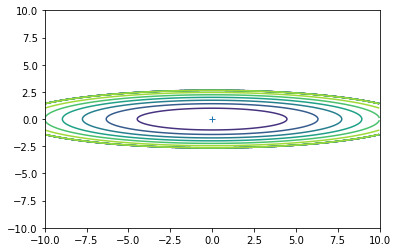

In [2]:
# Optimizer의 Path를 볼 수 있도록 움푹 파인 모양의 map 준비
def f(x, y):
    return x**2 / 20.0 + y**2

def df(x, y):
    return x / 10.0, 2.0 * y

x = np.arange(-10, 10, 0.01)
y = np.arange(-5, 5, 0.01)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

mask = Z > 7
Z[mask] = 0

plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.contour(X, Y, Z)
plt.plot(0, 0, "+")
plt.show()

In [3]:
# 초기화
init_pos = (-7.0, 2.0)
params = {}
params["x"], params["y"] = init_pos[0], init_pos[1]
grads = {}
grads["x"], grads["y"] = 0, 0

optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.1)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=0.1)

idx = 1

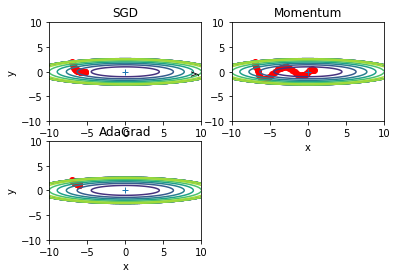

In [4]:
for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params["x"], params["y"] = init_pos[0], init_pos[1]

    for i in range(30):
        x_history.append(params["x"])
        y_history.append(params["y"])

        grads["x"], grads["y"] = df(params["x"], params["y"])
        optimizer.update(params, grads)

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)

    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0

    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, "o-", color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, "+")
    # colorbar()
    # spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")

plt.show()


- SGD, Adagrad의 진행도가 상당히 낮다. learning rate의 문제인 것 같아서 책의 learning rate를 그대로 이용해 보았다.

In [5]:
# 초기화
params = {}
params["x"], params["y"] = init_pos[0], init_pos[1]
grads = {}
grads["x"], grads["y"] = 0, 0

optimizers = OrderedDict()

optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)

idx = 1

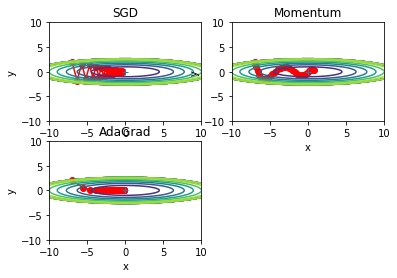

In [6]:
for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params["x"], params["y"] = init_pos[0], init_pos[1]

    for i in range(30):
        x_history.append(params["x"])
        y_history.append(params["y"])

        grads["x"], grads["y"] = df(params["x"], params["y"])
        optimizer.update(params, grads)

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)

    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0

    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, "o-", color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, "+")
    # colorbar()
    # spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")

plt.show()
